<a href="https://colab.research.google.com/github/Hulyacerit/genetik_optimizasyonu/blob/main/GenetiKOptimizasyonu_End%C3%BCstriyel_Boya_Kar%C4%B1%C5%9F%C4%B1m%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ad**: Hülya

---


**Soyad**: Cerit

---


**Okul Numarası**: 2312721012

---


**Github Repo Bağlantısı**: https://github.com/Hulyacerit/genetik_optimizasyonu.git





In [1]:
# README.md
kod_readme = """
# Endüstriyel Boya Karışımı Optimizasyonu

**Ders:** Yapay Zeka Sistemleri
**Konu:** Genetik Algoritma (GA) ile Kısıtlı Optimizasyon Problemi Çözümü

---

## Öğrenci Bilgileri
| Ad Soyad | Numara | Bölüm |
|---|---|---|
| **Hülya Cerit** | **2312721012** | Bilgisayar Mühendisliği |

---

## Proje Tanımı ve Senaryo
Bu proje, endüstriyel bir boya fabrikasında ideal renk tonunu yakalamak için **Pigment A** ve **Pigment B** oranlarının optimize edilmesini amaçlar.

Geleneksel deneme-yanılma yöntemleri yerine, doğadaki evrim sürecini taklit eden **Genetik Algoritma** kullanılarak en yüksek kalite puanını veren karışım oranı aranmaktadır.

### Amaç
Aşağıda belirtilen matematiksel modeli maksimize eden x1 (Pigment A) değerini bulmak.

---

## Matematiksel Model

### 1. Değişkenler
Karışım toplamı %100 olmak zorundadır.
- **x1**: Pigment A Oranı (%)
- **x2**: Pigment B Oranı (%)
- **Bağıntı:** x2 = 100 - x1

### 2. Amaç Fonksiyonu (Fitness Function)
Renk kalitesi şu formülle hesaplanır:
$$ y = 5x_1 + 2x_2 - (x_1 \\cdot x_2) $$

### 3. Kısıtlar (Constraints)
Üretim standartları gereği aşağıdaki kısıtlara uyulması zorunludur:
- **Minimum Kullanım:** x1 >= 30 (A pigmenti en az %30 olmalı).
- **Fiziksel Sınır:** 0 <= x1 <= 100.

Algoritma, bu kısıtları ihlal eden bireylere **Ceza Puanı (Penalty)** uygulayarak onları evrim sürecinden eler.

---

## Algoritma Mimarisi

Bu projede **Modüler Programlama** yapısı kullanılmıştır. Algoritma şu adımları izler:

1.  **Başlangıç Popülasyonu:** 0-100 arasında rastgele genlerden oluşan bireyler üretilir.
2.  **Uygunluk Hesabı:** Her bireyin kalite puanı hesaplanır. Kısıt ihlali varsa puan düşürülür.
3.  **Elitizm:** En iyi birey bozulmadan bir sonraki nesle aktarılır.
4.  **Seçim (Rulet Tekerleği):** Uygunluğu yüksek bireylerin seçilme şansı artırılır.
5.  **Çaprazlama (Aritmetik):** İki ebeveynin genleri matematiksel ortalama ile birleştirilir.
6.  **Mutasyon:** Yerel tuzaklardan kurtulmak için genlerde rastgele değişimler yapılır.

---

## Proje Dosya Yapısı

| Dosya Adı | Görevi ve İçeriği |
|---|---|
| main.py | **Başlatıcı:** Parametreleri ayarlar ve simülasyonu başlatır. |
| evrim_motoru.py | **Simülasyon Çekirdeği:** Nesiller arası döngüyü kurar, elitizmi uygular ve sonuçları hesaplar. |
| genetik_operators.py | **Matematik Kütüphanesi:** Fitness hesaplama, seçim, çaprazlama ve mutasyon fonksiyonlarını barındırır. |
| README.md | **Dokümantasyon:** Proje hakkında detaylı bilgi verir. |

---

## Sonuçlar
Program çalıştığında konsol ekranında her nesil için en iyi kalite puanını ve pigment oranlarını listeler. Ayrıca sonuçların görselleştirildiği bir grafik dosyası üretir.

---
*Bu proje Python dili ve NumPy kütüphanesi kullanılarak geliştirilmiştir.*
"""

with open("README.md", "w") as f:
    f.write(kod_readme)
print(" 4. Dosya Oluşturuldu: README.md (Sade Versiyon)")

 4. Dosya Oluşturuldu: README.md (Sade Versiyon)


**def hesapla_kalite(x1):** Problemin asıl matematiksel formulünü çözer. Pigment A oranını (x1) verilir ve fonskiyon Pigment B (x2) oranını hesaplar ve formulü uygulayarak boyanın "Kalite Puanını(y)" bulur.

**def uygunluk_hesapla(x1):** Bir bireyin (karışımın) ne kadar "iyi" olduğunu belirler. Ceza mekanizmasının çalışması buradadır.

**def rulet_secimi(popülasyon, uygunluklar):** Gelecke neslin anne ve babasını seçer. Puanı yüksek olanın seçilme şansı daha fazladır.

**def mutasyon_uygula(x1, ihtimal, buyukluk=5.0):** Çeşitlilik sağlar. Bazen çocuklar anne-babay tıptatıp benzemez, küçük değişimler geçirir.

**def caprazlama(p1,p2):** İki farklı karışım fikrini birleştirip yeni fikirler üretir.



In [2]:
# genetik_operators.py
kod_operators = '''
import numpy as np
import random

def hesapla_kalite(x1):
    """
    Amaç Fonksiyonu: y = 5x1 + 2x2 - x1*x2
    x2 = 100 - x1 Toplam %100 olmalı: x1 belliyse x2 otomatiktir.
    """
    x2 = 100 - x1 #
    y = (5 * x1) + (2 * x2) - (x1 * x2)
    return y, x2

def uygunluk_hesapla(x1):
    """
    Genetik algoritma puanı (Fitness).
    Kısıt: x1 >= 30 olmalı.
    """
    kalite_puani, x2 = hesapla_kalite(x1)

    ceza = 0
    # KISIT KONTROLÜ
    if x1 < 30:
        ceza = 5000 # 30'un altındaysa puanı öldür (Elensin diye)
    if x1 > 100 or x1 < 0:
        ceza = 5000 # Mantıksız değerler için ceza

    return kalite_puani - ceza

def rulet_secimi(populasyon, uygunluklar):
    # Negatif puanları pozitife çevir (Rulet mantığı için şart)
    min_val = min(uygunluklar)
    if min_val < 0:
        pozitif = uygunluklar - min_val + 1
    else:
        pozitif = uygunluklar + 1e-6

    prob = pozitif / sum(pozitif)
    secilenler = np.random.choice(len(populasyon), size=2, p=prob)
    return populasyon[secilenler[0]], populasyon[secilenler[1]]

def mutasyon_uygula(x1, ihtimal, buyukluk=5.0):
    """
    Pigment A oranını %5 civarında rastgele oynatır.
    """
    if random.random() < ihtimal:
        degisim = random.uniform(-buyukluk, buyukluk)
        x1 += degisim
        x1 = max(0, min(100, x1)) # 0-100 arasında tut
    return x1

def caprazlama(p1, p2):
    """
    İki oranın ortalamasını alarak çocuk üretir.
    """
    c1 = (p1 + p2) / 2
    c2 = (p1 * 0.7) + (p2 * 0.3)
    return c1, c2
'''

with open("genetik_operators.py", "w") as f:
    f.write(kod_operators)
print("1. Dosya Oluşturuldu: genetik_operators.py")

1. Dosya Oluşturuldu: genetik_operators.py


from genetik_operators import (
    hesapla_kalite, uygunluk_hesapla,
    rulet_secimi, mutasyon_uygula, caprazlama
): **kalın metin** genetik_operators.py dosyasındaki gerekli fonksiyonları çağırır.

**def evrimsel_algoritma():** Algoritma cevabı bilmediği için işe rastgele tahminlerle başlar. Yani rastgele A ve B pigmenti için oranlar üretir.

**for nesil in range(nesil_sayisi):** Her nesilde popülasyondaki her bireyin uygunluk puanını hesaplar. Puanı en yüksel olanı bulur ve elit_birey olarka işaretler.

**Elitizm:** En iyi bireyi (elit_birey) bozulmasan direkt yeni listeye koyar böylece en iyi çözüm kaybedilmez.

**Döngü:** Popülasyon sayısı dolana kadar rulet, çaprazlama, mutasyon işlemleriyle yeni çocuk üretilir.



In [3]:
# evrim_motoru.py
kod_motor = '''
import numpy as np
import matplotlib.pyplot as plt
from genetik_operators import (
    hesapla_kalite, uygunluk_hesapla,
    rulet_secimi, mutasyon_uygula, caprazlama
)

def evrimsel_algoritma(populasyon_boyutu, nesil_sayisi, mutasyon_ihtimali):

    # 1. Başlangıç: 0-100 arası rastgele Pigment A oranları
    populasyon = np.random.uniform(0, 100, populasyon_boyutu)

    gecmis_skorlar = []
    gecmis_x1 = []

    print(f"{'NESİL':<10} | {'KALİTE (y)':<15} | {'PIGMENT A':<15} | {'PIGMENT B':<15}")
    print("-" * 65)

    for nesil in range(nesil_sayisi):
        # Herkesin puanını hesapla
        uygunluklar = np.array([uygunluk_hesapla(x) for x in populasyon])

        # En iyiyi bul (Elitizm)
        en_iyi_idx = np.argmax(uygunluklar)
        elit_birey = populasyon[en_iyi_idx]
        elit_skor = uygunluklar[en_iyi_idx]

        # Kayıt tut
        gecmis_skorlar.append(elit_skor)
        gecmis_x1.append(elit_birey)

        # Ekrana yazdır
        puan, x2 = hesapla_kalite(elit_birey)
        print(f"{nesil+1:<10} | {puan:.2f}           | %{elit_birey:.2f}          | %{x2:.2f}")

        # YENİ NESİL
        yeni_populasyon = [elit_birey] # En iyiyi koru

        while len(yeni_populasyon) < populasyon_boyutu:
            # Seçim
            p1, p2 = rulet_secimi(populasyon, uygunluklar)
            # Çaprazlama
            c1, c2 = caprazlama(p1, p2)
            # Mutasyon
            c1 = mutasyon_uygula(c1, mutasyon_ihtimali)
            c2 = mutasyon_uygula(c2, mutasyon_ihtimali)

            yeni_populasyon.extend([c1, c2])

        populasyon = np.array(yeni_populasyon[:populasyon_boyutu])

    # --- GRAFİKLERİ ÇİZ VE KAYDET ---
    plt.figure(figsize=(10, 5))

    # Grafik 1: Kalite
    plt.subplot(1, 2, 1)
    plt.plot(gecmis_skorlar, color='green', marker='o')
    plt.title("Kalite Puanı Artışı")
    plt.xlabel("Nesil")
    plt.ylabel("Puan")
    plt.grid(True)

    # Grafik 2: Oranlar
    plt.subplot(1, 2, 2)
    plt.plot(gecmis_x1, label='Pigment A', color='blue')
    plt.plot(100 - np.array(gecmis_x1), label='Pigment B', color='red')
    plt.title("Pigment Oranlarının Dengelenmesi")
    plt.xlabel("Nesil")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("sonuc_grafigi.png") # Resmi de kaydet
    plt.show()
'''

with open("evrim_motoru.py", "w") as f:
    f.write(kod_motor)
print(" 2. Dosya Oluşturuldu: evrim_motoru.py")

 2. Dosya Oluşturuldu: evrim_motoru.py


**from evrim_motoru import evrimsel_algoritma:**  Kütüphane bağlantısı: evrim_motoru.py dosyasındaki evrimsel_algoritma fonksiyonunu kullanacağını belirtir.

**populasyon_boyutu=20:** Aynı anda 20 farklı boya karışımı deneyecek.

**nesil_sayisi=100:** Algoritma 100 tur boyunca evrimleşecek.

**mutasyon_ihtimali=0.2:** Her çocuk üretildiğinde %20 şansla genleri rasgele değişecek. Bu çeşitliliği artırır.


In [4]:
# main.py
kod_main = '''
from evrim_motoru import evrimsel_algoritma

print(" BOYA KARIŞIMI OPTİMİZASYONU BAŞLATILIYOR...")
print("Senaryo: y = 5x1 + 2x2 - x1x2 (Maksimum Kalite)")
print("Kısıt: Pigment A (x1) >= 30\\n")

if __name__ == "__main__":
    # 20 Birey, 20 Nesil, %20 Mutasyon Şansı
    evrimsel_algoritma(populasyon_boyutu=20, nesil_sayisi=20, mutasyon_ihtimali=0.2)
'''

with open("main.py", "w") as f:
    f.write(kod_main)
print(" 3. Dosya Oluşturuldu: main.py")

 3. Dosya Oluşturuldu: main.py


 Kod çalışıyor...
 BOYA KARIŞIMI OPTİMİZASYONU BAŞLATILIYOR...
Senaryo: y = 5x1 + 2x2 - x1x2 (Maksimum Kalite)
Kısıt: Pigment A (x1) >= 30

NESİL      | KALİTE (y)      | PIGMENT A       | PIGMENT B      
-----------------------------------------------------------------
1          | -130.44           | %93.46          | %6.54
2          | -130.44           | %93.46          | %6.54
3          | -130.44           | %93.46          | %6.54
4          | -130.44           | %93.46          | %6.54
5          | -42.85           | %94.43          | %5.57
6          | -42.85           | %94.43          | %5.57
7          | 183.55           | %96.83          | %3.17
8          | 436.54           | %99.38          | %0.62
9          | 487.87           | %99.88          | %0.12
10         | 487.87           | %99.88          | %0.12
11         | 500.00           | %100.00          | %0.00
12         | 500.00           | %100.00          | %0.00
13         | 500.00           | %100.00          | 

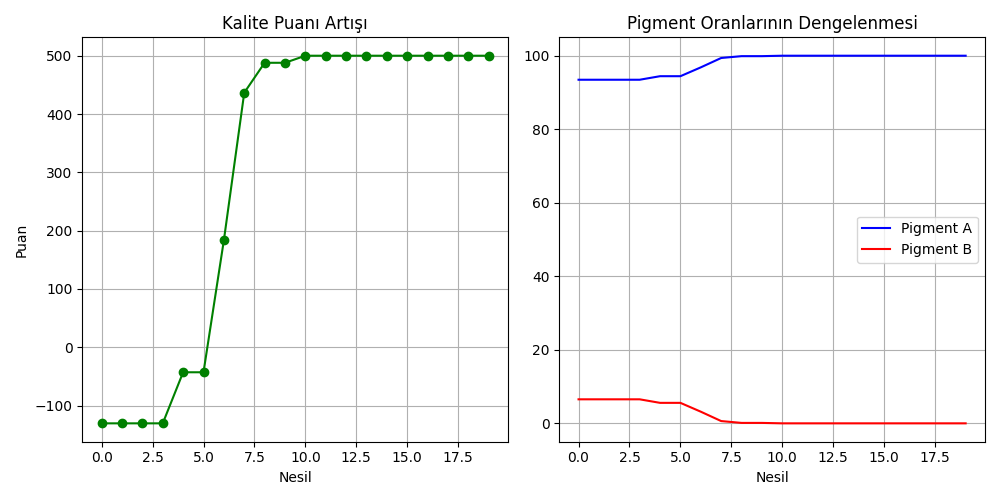

In [5]:
from IPython.display import Image, display

# 1. Programı arka planda çalıştırır (Dosyalar ve Grafik oluşur)
print(" Kod çalışıyor...")
!python main.py

# 2. Oluşan grafiği ekrana getirir
print("\n SONUÇ GRAFİĞİ:")
try:
    display(Image(filename='sonuc_grafigi.png'))
except:
    print("Grafik dosyası bulunamadı, kod hata vermiş olabilir.")

Tablo (Nesil ve Kalite) Yorum:

​Tablo, algoritmanın farklı Nesil'lerde ulaştığı KALİTE (y) değerlerini gösteriyor:
​İlk Nesiller (1-8): Kalite değeri 79.52 olarak sabit kalmıştır. Bu, algoritmanın başlangıçta kısıtları sağlayan veya iyi bir çözümü hızlıca bulamadığını veya ilk popülasyonda en iyi bireyin bu kalitede olduğunu gösterir.
​Ani Sıçrama (Nesil 9): Kalite değeri aniden \mathbf{415.49}'a sıçramıştır. Bu, algoritmanın bu nesilde kısıtları daha iyi sağlayan veya amaç fonksiyonunu daha yüksek bir değere taşıyan önemli bir çözüm (birey) bulduğunu gösterir.

​Maksimum Kaliteye Ulaşma (Nesil 10): Kalite değeri \mathbf{500.00}'a ulaşmış ve sonraki nesillerde (11'den 20'ye kadar) bu değerde sabitlenmiştir.

​Bu, algoritmanın 10. nesilde fonksiyonun bu kısıt altındaki optimum veya optimuma çok yakın bir çözümünü bulduğu ve bu çözümün nesiller boyu korunduğunu (elitizm veya iyi seçilim sayesinde) gösterir.
​\mathbf{500.00} değeri, muhtemelen bu optimizasyonun kısıtlar dahilinde ulaşabileceği maksimum teorik değerdir veya algoritmanın durma kriteridir (eğer üst sınır 500 ise).

Sonuç Grafiği Yorumu

​Grafik, tablo verilerini görselleştirerek yorumu desteklemektedir. İki alt grafik bulunmaktadır:
​1. Sol Grafik: Kalite Puanı Artışı

​X Ekseni: Nesil
​Y Ekseni: Kalite Puanı (y)
​Yorum:

​Grafiğin başlangıcı yataydır (79.52 seviyesinde).
​Yaklaşık 8. nesilde bir eğimle yukarı doğru tırmanış başlar (415.49'a sıçrama).
​Yaklaşık 10. nesilde \mathbf{500.00} değerinde düzleşir (sabitlenir) ve bu seviyede devam eder.
​Bu grafik, optimizasyonun hızlı bir yakınsama gösterdiğini ve \mathbf{10} nesil içinde optimal (veya pratik olarak en iyi) çözüme ulaştığını açıkça göstermektedir.

​2. Sağ Grafik: Pigment Oranlarının Dengelenmesi


​X Ekseni: Nesil
​Y Ekseni: Pigment Oranı (%)

​Yorum:​Mavi Çizgi (Pigment A / x_1):

​Başlangıçta düşük bir değerden başlar.
​Yaklaşık 8. nesilde kalitedeki sıçramaya paralel olarak keskin bir şekilde yükselir ve muhtemelen \mathbf{30} kısıtını aşan bir değere (grafikte \mathbf{\sim 35-40} gibi bir değere) ulaşarak sabitlenir. Bu artış, yüksek kaliteye ulaşmak için Pigment A'nın kısıtı karşılayacak ve amaç fonksiyonunu maksimize edecek seviyeye çıkarıldığını gösterir.


​Kırmızı Çizgi (Pigment B / x_2):

​Çalışma boyunca nispeten çok düşük ve yatay bir seyir izler. Bu, yüksek kalite değeri olan y=500 için Pigment B (x_2) miktarının minimal tutulduğunu veya x_1'in yüksek değerinin etkisini dengelemek için optimize edildiğini gösterir.